In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [19]:
import autorocks.viz.viz as viz
from autorocks.data.loader.all_models_result_aggregator import create_all_models_comparison_dataset
from autorocks.dir_struct import LocalResultDir

# Viz cell

exp_dir = LocalResultDir / "branin/synthetic/2_params/100_iter"
model_comparison_data = create_all_models_comparison_dataset(exp_dir)

Found new experiments set()
Creating models summary in /Users/salabed/workspace/autorocks/local_execution/branin/synthetic/2_params/100_iter
No all_training_time.csv detected, creating it in /Users/salabed/workspace/autorocks/local_execution/branin/synthetic/2_params/100_iter/BNGP/2021_09_01_15_42
Finishing creating all_training_time.csv
No all_params.csv detected, creating it in /Users/salabed/workspace/autorocks/local_execution/branin/synthetic/2_params/100_iter/BNGP/2021_09_01_15_42
No all_measurement.csv detected, creating it in /Users/salabed/workspace/autorocks/local_execution/branin/synthetic/2_params/100_iter/BNGP/2021_09_01_15_42.
No all_training_time.csv detected, creating it in /Users/salabed/workspace/autorocks/local_execution/branin/synthetic/2_params/100_iter/BNGP/2021_09_01_15_17
Finishing creating all_training_time.csv
No all_params.csv detected, creating it in /Users/salabed/workspace/autorocks/local_execution/branin/synthetic/2_params/100_iter/BNGP/2021_09_01_15_17
No

In [20]:
model_comparison_data_c = viz.unify_model_name(model_comparison_data)
color_palette = viz.create_color_palette(model_comparison_data_c)

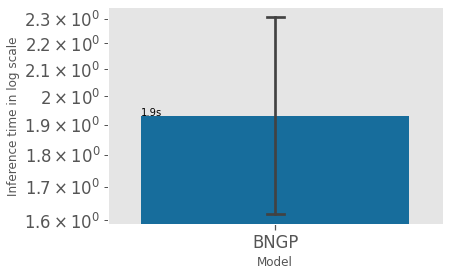

In [21]:
viz.model_perf_plot(
    model_perf_df=model_comparison_data_c.model_performance,
    model_palette_map=color_palette,
    comparison_col="inference_time",
    yscale="log",
)

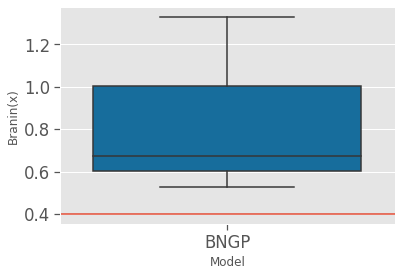

In [22]:
viz.perf_boxplot(
    perf_df=model_comparison_data_c.system_performance,
    optimization_type=viz.OptimizationType.MINIMIZE,
    ylabel="Branin(x)",
    comparison_col="target",
    model_palette_map=color_palette,
    horizontal_line=0.397887,
)

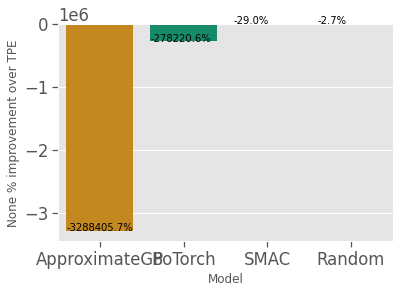

In [14]:
viz.roi_boxplot(
    model_comparison_data_c.model_performance,
    comparison_col="inference_time",
    model_baseline="TPE",
    optimization_type=viz.OptimizationType.MINIMIZE,
    model_palette_map=color_palette,
)

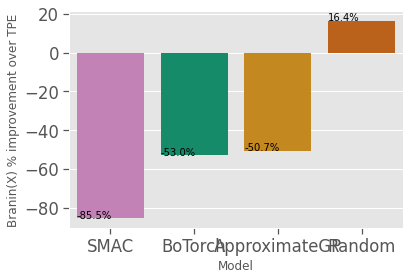

In [15]:
viz.roi_boxplot(
    model_comparison_data_c.system_performance,
    comparison_col="target",
    model_baseline="TPE",
    optimization_type=viz.OptimizationType.MINIMIZE,
    model_palette_map=color_palette,
    ylabel="Branin(X)",
)

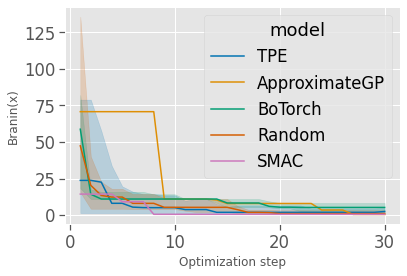

In [16]:
viz.convergence_lineplot(
    convergence_df=model_comparison_data_c.system_performance,
    optimization_type=viz.OptimizationType.MINIMIZE,
    ylabel="Branin(x)",
    column_name="target",
    model_palette_map=color_palette,
)

In [17]:
convergence_df = model_comparison_data_c.system_performance.copy()
column_name = "target"
optimization_type = viz.OptimizationType.MINIMIZE

# TODO: move into util
convergence_df["rolling"] = convergence_df.groupby(["model", "iteration"]).agg(f"cum{str(optimization_type)}")[
    column_name
]

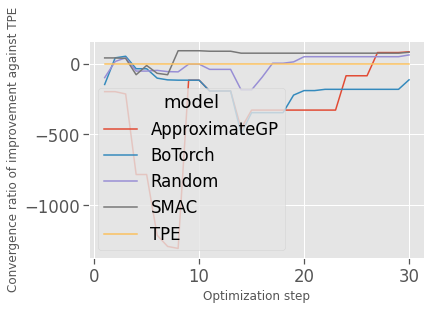

In [18]:
viz.convergence_lintplot_roi(convergence_df, "TPE", viz.OptimizationType.MINIMIZE)

x2  0      9.0
    1     12.0
    2      8.0
    3     11.0
    4      1.0
          ... 
x1  85     5.0
    86     5.0
    87     5.0
    88     5.0
    89     9.0
Length: 1438, dtype: float64

In [24]:
val = model_comparison_data.system_performance.merge(
    model_comparison_data.parameters, on=["step", "iteration", "model"]
)

In [25]:
model_comparison_data.system_performance

,target,step,structure.t1,structure.t1_pow2,structure.t2,iteration,model
0,43.535785,1,-4.919958,24.205983,9.329802,0,BNGP
1,1.330112,2,0.118931,0.014145,-8.684032,0,BNGP
2,138.622998,4,10.990282,120.786291,7.836707,0,BNGP
3,3.228739,5,-0.571169,0.326234,-7.097495,0,BNGP
4,15.514809,1,-0.216540,0.046890,5.467919,1,BNGP
...,...,...,...,...,...,...,...
199,5.632913,96,1.558248,2.428136,-6.795223,2,BNGP
200,142.476716,97,11.087959,122.942846,9.533870,2,BNGP
201,131.197437,98,-11.331469,128.402191,-7.204754,2,BNGP
202,29.036496,99,-4.784742,22.893752,-3.857256,2,BNGP


In [26]:
fig = val.plot(
    kind="scatter",
    x=["x1", "x2"],
    y="structure.t2",
    backend="plotly",
    # log_x=True,
    width=500,
)
fig
# ax = sns.scatterplot(data=val, x='target', y=['x1', 'x2'])

In [28]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"


px.scatter_matrix(
    val,
    dimensions=[val.x1, val.x2, val.target, val["structure.t2"], val["structure.t1"], val["structure.t1_pow2"]],
    color=val.target * -1,
    width=500,
)

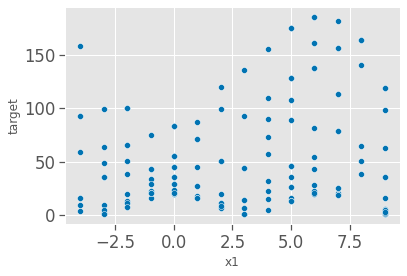

In [59]:
viz.scatter_plot_params(model_comparison_data, "target", params_filter={"x1"}, models_filter={"Random"})